# Bike Sharing Dataset

In [38]:
## Github link here: https://github.com/hellystia/Final-Project

In [39]:
## This is the key for the data in the spreadsheet.

<p>
    Prediction of bike rental count hourly based on environmental and seasonal settings.
<p>
    <b> Columns:</b>
<p>
<li> season: Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)
<li> weathersit: (1: Clear, 2: Cloudy, 3: Light Snow, 4: Heavy Rain)
<li> yr: year (0: 2011, 1: 2012)
<li> mnth: month (1-12)
<li> hr: hour (0-23)
<li> temp: temp (I was told that this was in Celcius, but it does not make sense given the numnbers.)
<li> aTemp: feeling temp 
<li> Holiday: Does the day fall on a holiday? (0 no, 1 yes)
<li> Working day: Does the day fall on a "working day" (or, alternatively, a weekend?) (0 no, 1 yes)
<li> windspeed: 67 max
<li> casual: count of casual users
<li> registered: count of registered users
<li> cnt: count of total rental  bikes, including casual and registered

## Import Libraries

In [40]:
## Start by importing libraries I'll need: pandas, scipy, numpy, and seaborn for data exploration and initial analysis.

In [41]:
import pandas as pd
from scipy import stats
from scipy.stats import norm
import numpy as np
import seaborn as sns

## Load the dataset into a dataframe

In [42]:
## Here we will look at the layout of the data to see how it is presented. 
## We will look at the first 10 rows with the function .head(10).

In [43]:
bikes = pd.read_csv("C:/Users/Helly/Desktop/Final Project/hour.csv")

In [44]:
bikes.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,1/1/2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,1/1/2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,1/1/2011,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,1/1/2011,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,1/1/2011,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


<p>
<b> Observations About the Initial Data Set </b>
<p>
<li> The dates (dteday) will need to be reformatted for analysis.
<li> The season, year, holiday, weekday, workingday, and weather columns are already recoded, but I will replicate this for the project.
<li> It appears that each day has rentals divided into rentals per hour. 
<li> The humidity is in decimal format, which means I will have to convert it to a percentage.
<li> The temperature appears to be in Celcius. I don't imagine many people would rent bikes if it's 20 degrees Fahrenheit.
<li> The registered versus casual counts could be interesting to compare, as they seem to differ quite a bit.

## Pre-Processing: Data Wrangling/Data Analysis

### Descriptive Statistics

<p>
Descriptive statistics will cover:
    <p>
<li>The item count 
<li>Measures of central tendency: mean, median, and mode.
<li>Standard deviation, quartiles, and interquartile ranges.

#### Count

In [45]:
bikes.count()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

In [46]:
## The count is the same for all of these because this is the number of rows in the data set.

#### Mean

In [48]:
bikes.mean()

C:\Users\Helly\AppData\Local\Temp/ipykernel_17712/1754243642.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bikes.mean()


instant       8690.000000
season           2.501640
yr               0.502561
mnth             6.537775
hr              11.546752
holiday          0.028770
weekday          3.003683
workingday       0.682721
weathersit       1.425283
temp             0.496987
atemp            0.475775
hum              0.627229
windspeed        0.190098
casual          35.676218
registered     153.786869
cnt            189.463088
dtype: float64

In [49]:
## The mean is useful for a few of these categories: Hour, Weekday, Temp, aTemp, Humidity, Windspeed, Casual, Registered, and Cnt.

#### Median

In [50]:
bikes.median()

C:\Users\Helly\AppData\Local\Temp/ipykernel_17712/4100074620.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bikes.median()


instant       8690.0000
season           3.0000
yr               1.0000
mnth             7.0000
hr              12.0000
holiday          0.0000
weekday          3.0000
workingday       1.0000
weathersit       1.0000
temp             0.5000
atemp            0.4848
hum              0.6300
windspeed        0.1940
casual          17.0000
registered     115.0000
cnt            142.0000
dtype: float64

In [52]:
## These numbers aren't terribly different other than the rental counts. 
## Perhaps this is due to some days with "surges" in rentals. We will see in the max/min section.

#### Mode

In [53]:
bikes.mode()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,3.0,1.0,5.0,16.0,0.0,6.0,1.0,1.0,0.62,0.6212,0.88,0.0,0.0,4.0,5.0
1,2,1/1/2012,NaN,NaN,7.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1/10/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1/11/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1/12/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17375,17376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,17377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17377,17378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
## What does the mode tell us? The most frequently occurring value in each column.
## This is useful for season, year, month, hour, holiday, workingday, weekday, and weathersit. That's because these have 
## already been dummy coded, so we can see which "bins" have the most frequently occurring values.
## For example: The most commonly occurring season is 3, or fall. The year is 1, or 2012. The month is 5, or May.
## The weekday is 6, or Saturday. Workingday is 1, or "yes" (M-F). And weathersit is 1, or "sunny."

#### Max

In [55]:
bikes.max()

instant          17379
dteday        9/9/2012
season               4
yr                   1
mnth                12
hr                  23
holiday              1
weekday              6
workingday           1
weathersit           4
temp               1.0
atemp              1.0
hum                1.0
windspeed       0.8507
casual             367
registered         886
cnt                977
dtype: object

In [56]:
## Now we can see that the maximum values for the rental categories are way off from the averages, which might explain why
## our average and median values are so different. And that windspeed looks downright hurricane-like. (An error?)

#### Min

In [57]:
bikes.min()

instant              1
dteday        1/1/2011
season               1
yr                   0
mnth                 1
hr                   0
holiday              0
weekday              0
workingday           0
weathersit           1
temp              0.02
atemp              0.0
hum                0.0
windspeed          0.0
casual               0
registered           0
cnt                  1
dtype: object

In [58]:
## The minimum amounts dont' tell us much other than there were some really cold days (2 degrees), and the lowest number
## of rentals was 1. 

#### Standard Deviation

In [59]:
bikes.std()

C:\Users\Helly\AppData\Local\Temp/ipykernel_17712/2440403260.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bikes.std()


instant       5017.029500
season           1.106918
yr               0.500008
mnth             3.438776
hr               6.914405
holiday          0.167165
weekday          2.005771
workingday       0.465431
weathersit       0.639357
temp             0.192556
atemp            0.171850
hum              0.192930
windspeed        0.122340
casual          49.305030
registered     151.357286
cnt            181.387599
dtype: float64

In [63]:
## Here we can see the standard deviation for each category. This is not particularly useful for the dummy coded variables,
## but we can see that it is helpful for Temp, aTemp, Windspeed, Casual, Registered, and Cnt.
## What does a standard deviation mean, given a normal distribution of data? 
    ## 68% of our data will fall into one standard deviation of the mean;
    ## 95% within 2 standard deviations of the mean;
    ## 99.5% within 3 standard deviations of the mean.
## So for example, 68% of our rental counts (cnt) should fall between 8 and 370, given a mean of 189.

#### Percentiles

In [65]:
print(bikes.quantile(q=[0.25, 0.5, 0.75, 0.95, 0.995]))

        instant  season   yr  mnth    hr  holiday  weekday  workingday  \
0.250   4345.50     2.0  0.0   4.0   6.0      0.0      1.0         0.0   
0.500   8690.00     3.0  1.0   7.0  12.0      0.0      3.0         1.0   
0.750  13034.50     3.0  1.0  10.0  18.0      0.0      5.0         1.0   
0.950  16510.10     4.0  1.0  12.0  22.0      0.0      6.0         1.0   
0.995  17292.11     4.0  1.0  12.0  23.0      1.0      6.0         1.0   

       weathersit  temp   atemp   hum  windspeed  casual  registered     cnt  
0.250         1.0  0.34  0.3333  0.48     0.1045     4.0        34.0   40.00  
0.500         1.0  0.50  0.4848  0.63     0.1940    17.0       115.0  142.00  
0.750         2.0  0.66  0.6212  0.78     0.2537    48.0       220.0  281.00  
0.950         3.0  0.80  0.7424  0.93     0.4179   138.1       465.0  563.10  
0.995         3.0  0.90  0.8485  1.00     0.5821   267.0       749.0  835.22  


In [66]:
## The top row isn't very helpful here because these are already dummy coded.
## However, we can see in the bottom row the 25th, 50th, 75th, 95th, and 95.5th percentiles for our counted data.
## Looking at cnt again, it appears that the 75th percentile is 281 while the 90th is 563, meaning that this data seems heavily
## clustered in the 100-300 counts. I am betting this is positively skewed.

### Check the types of variables using the dtype function. Transfer object types as needed.

In [67]:
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [68]:
## The 'dteday' column is an object instead of an integer or float. I will convert it to datetime.

In [69]:
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

### Recheck all data types using the dtypes function.

In [70]:
bikes.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### getdummies of categorical variables

In [71]:
## We already know that we have dummy coded variables; however, we will do this
## to make sure we have it coded in our data frame.
## getdummies of the following: season, weathersit

In [72]:
seasonDummy = pd.get_dummies(bikes['season'], drop_first=True)

In [73]:
seasonDummy.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [74]:
weathersitDummy = pd.get_dummies(bikes['weathersit'], drop_first=True)

In [75]:
weathersitDummy.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


### Check for missing values

In [76]:
print(bikes.isna())

       instant  dteday  season     yr   mnth     hr  holiday  weekday  \
0        False   False   False  False  False  False    False    False   
1        False   False   False  False  False  False    False    False   
2        False   False   False  False  False  False    False    False   
3        False   False   False  False  False  False    False    False   
4        False   False   False  False  False  False    False    False   
...        ...     ...     ...    ...    ...    ...      ...      ...   
17374    False   False   False  False  False  False    False    False   
17375    False   False   False  False  False  False    False    False   
17376    False   False   False  False  False  False    False    False   
17377    False   False   False  False  False  False    False    False   
17378    False   False   False  False  False  False    False    False   

       workingday  weathersit   temp  atemp    hum  windspeed  casual  \
0           False       False  False  False  False

In [77]:
bikesClean = bikes.dropna(axis='columns')

In [78]:
bikesClean.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Check the Distribution of Variables and Check Outliers

C:\Users\Helly\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


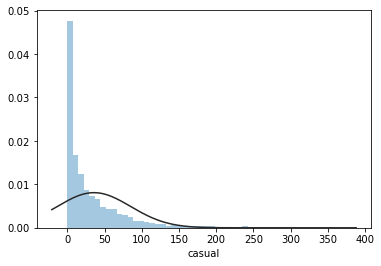

In [79]:
casualBikesHist = sns.distplot(bikesClean["casual"], fit = norm, kde=False)

In [ ]:
## The casual count is definitely positively skewed. Let's check the registered count.

C:\Users\Helly\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


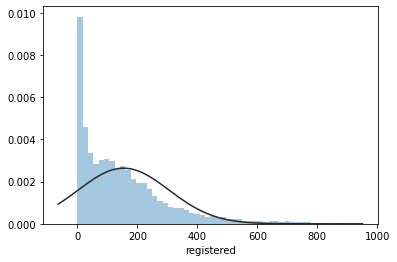

In [79]:
registeredBikesHist = sns.distplot(bikesClean["registered"], fit=norm, kde=False)

In [80]:
## The registered count is also positively skewed. This means our cnt (total) will also be positively skewed.

C:\Users\Helly\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


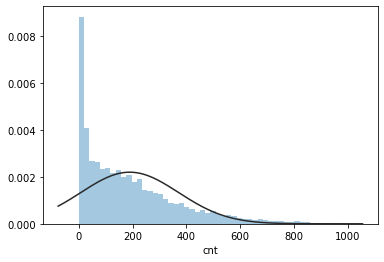

In [81]:
cntBikesHist = sns.distplot(bikesClean["cnt"], fit=norm, kde=False)

In [83]:
## The count is indeed positively skewed. There are some outliers causing the shape of our data to be more platykurtic.